In [1]:
import matplotlib.pyplot as plt
import numpy as np

# III-3
f0 = 2400  # Гц
Vmod = 600  # Бод
Vinf = 1200  # бит/с
T = 1 / Vmod
m = Vinf // Vmod
q = 2 ** m
A = 1  # амплитуда
Ns = 12
dt = (1/f0)/Ns

# Получение коэффициентов по номеру сигнала


def getSi12(i):
    i1 = i // np.sqrt(q)
    i2 = i % np.sqrt(q)
    si1 = A * (1 - ((2 * i1) / (np.sqrt(q) - 1)))
    si2 = A * (1 - ((2 * i2) / (np.sqrt(q) - 1)))
    return si1, si2


def S(si, t):
    return (si[0] * np.sqrt(2 / T) * np.cos(2 * np.pi * f0 * t) + 
            si[1] * np.sqrt(2 / T) * np.sin(2 * np.pi * f0 * t))


# Ортонормированные функции


def phi1(t):
    return np.sqrt(2 / T) * np.cos(2 * np.pi * f0 * t)


def phi2(t):
    return np.sqrt(2 / T) * np.sin(2 * np.pi * f0 * t)

t = np.arange(0, T, dt)

# Проверка равенства (3.1)
print('(phi1, phi1) = {}'.format(np.trapz(phi1(t) * phi1(t), dx=dt)))
print('(phi1, phi2) = {}'.format(np.trapz(phi1(t) * phi2(t), dx=dt)))
print('(phi2, phi1) = {}'.format(np.trapz(phi2(t) * phi1(t), dx=dt)))
print('(phi2, phi2) = {}'.format(np.trapz(phi2(t) * phi2(t), dx=dt)))

(phi1, phi1) = 0.9635416666666673
(phi1, phi2) = 0.009021097956087663
(phi2, phi1) = 0.009021097956087663
(phi2, phi2) = 0.9947916666666667


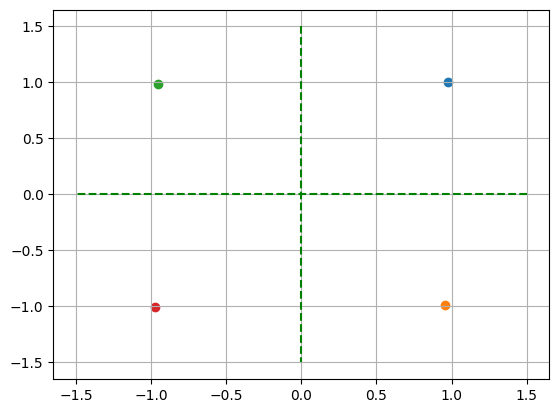

In [2]:
for i in range(q):
    Si12 = getSi12(i)
    Si = S(Si12, t)
    x = phi1(t)
    y = phi2(t)
    Sijx = np.trapz(Si * x, dx=dt)
    Sijy = np.trapz(Si * y, dx=dt)
    plt.scatter(Sijx, Sijy)  # , label='S{}'.format(i))

size = int(np.sqrt(q))
dx = 1 / size
areas = np.linspace(-1.0 - dx, 1.0 + dx, size + 1)

draw_lines = True

if draw_lines:
    for i, val in enumerate(areas):
        if i == 0 or i == size:
            continue
        plt.plot([val, val], [1.0 + dx, -1.0 - dx],
                 color="green", linestyle="--")
        plt.plot([1.0 + dx, -1.0 - dx], [val, val],
                 color="green", linestyle="--")

# plt.legend()
plt.grid()
plt.show()
